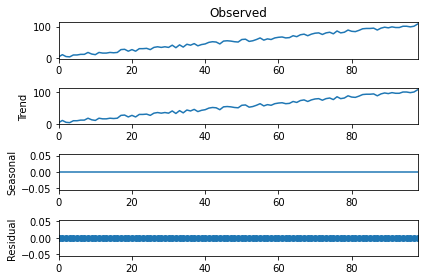

In [6]:
# Additive Decomposition
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

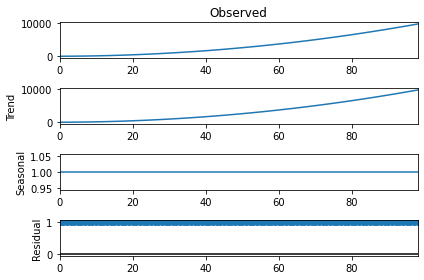

In [7]:
# Multiplicative Decomposition
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', period=1)
result.plot()
pyplot.show()

Taking a sample data-set to further understand the decomposition types

#### Python Time-Series Decomposition

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose as sm

In [9]:
# stting the range of time series
T_Series = np.arange(1, 51)

In [10]:
Trend = T_Series * 2.75

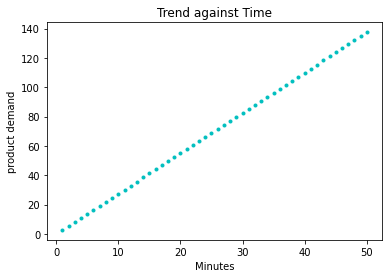

In [11]:
plt.plot(T_Series, Trend, 'c.')
plt.title("Trend against Time")
plt.xlabel("Minutes")
plt.ylabel("product demand");

In [12]:
# creating the seasonality component
seasonality = 10 + np.sin(T_Series) * 10

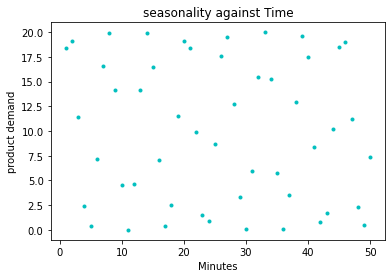

In [13]:
plt.plot(T_Series, seasonality, 'c.')
plt.title("seasonality against Time")
plt.xlabel("Minutes")
plt.ylabel("product demand");

In [14]:
np.random.seed(10)  # for result reproducibility
residual = np.random.normal(loc=0.0, scale=1, size=len(T_Series))

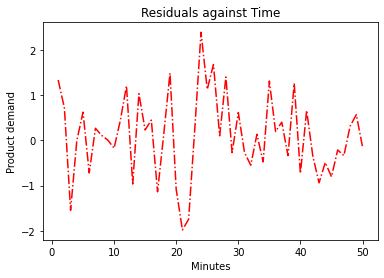

In [15]:
plt.plot(T_Series, residual, 'r-.')
plt.title("Residuals against Time")
plt.xlabel("Minutes")
plt.ylabel("Product demand");

In [16]:
# additive tine series model
additive_Tmodel = Trend + seasonality + residual

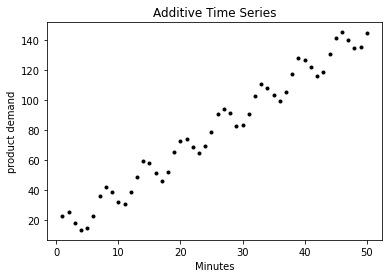

In [17]:
plt.plot(T_Series, additive_Tmodel, 'k.')
plt.title("Additive Time Series")
plt.xlabel("Minutes")
plt.ylabel("product demand");

In [18]:
# we ignore residual to make the pattern more apparent
ignored_residual = np.ones_like(residual)
# we multiply other components to create a multiplicative time series
multiplicative_Tmodel = Trend * seasonality * ignored_residual

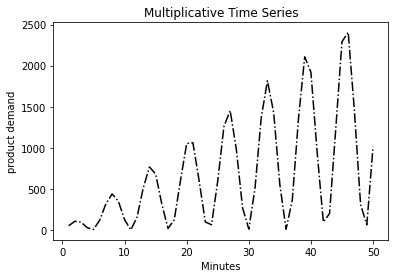

In [19]:
plt.plot(T_Series, multiplicative_Tmodel, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel("Minutes")
plt.ylabel("product demand");

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
# frequency is the time a time serie is taking to complete on cycal
ts_dicomposition = seasonal_decompose(x=additive_Tmodel, model='additive', freq=6)
trend_estimate = ts_dicomposition.trend
seasonal_estimate = ts_dicomposition.seasonal
residual_estimate = ts_dicomposition.resid

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

NameError: name 'trend_estimate' is not defined

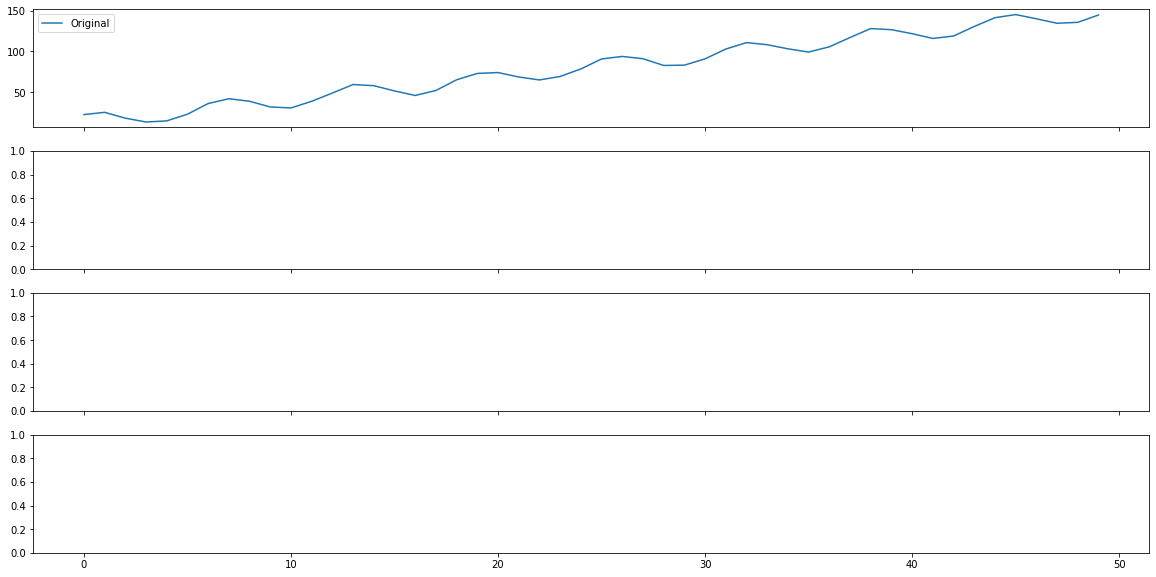

In [15]:
# Plotting the time series and it's components together
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(20)
# First plot to the Original time series
axes[0].plot(additive_Tmodel, label='Original') 
axes[0].legend(loc='upper left');
# second plot to be for trend
axes[1].plot(trend_estimate, label='Trend')
axes[1].legend(loc='upper left');
# third plot to be Seasonality component
axes[2].plot(seasonal_estimate, label='Seasonality')
axes[2].legend(loc='upper left');
# last last plot to be Residual component
axes[3].plot(residual_estimate, label='Residuals')
axes[3].legend(loc='upper left');

In [16]:
ts_decomposition = seasonal_decompose(x=multiplicative_Tmodel, model='multiplicative', freq=6)
trend_estimate = ts_decomposition.trend
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

NameError: name 'trend_estimate' is not defined

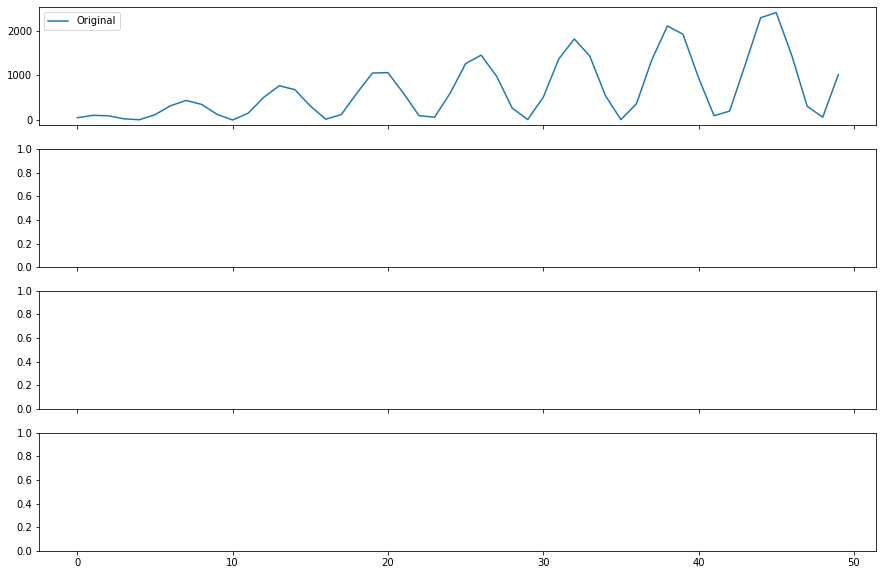

In [17]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(multiplicative_Tmodel, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(trend_estimate, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(seasonal_estimate, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(residual_estimate, label='Residuals')
axes[3].legend(loc='upper left');

In [3]:
pip install yfinance

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached yfinance-0.1.70-py2.py3-none-any.whl (26 kB)
  Using cached multitasking-0.0.10-py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 1.3 MB/s eta 0:00:0000:0100:010m
  Preparing metadata (setup.py) ... done
  Created wheel for lxml: filename=lxml-4.8.0-cp39-cp39-macosx_12_0_arm64.whl size=1510859 sha256=346cbe7a6037aa1f92ce4efd5b7671006ca88fb46985a43ce2d28a6c4a6d772e
  Stored in directory: /Users/alinauman/Library/Caches/pip/wheels/16/8f/83/00db00dbf8e5bf5794152a315e21beec1e43fb55c884454a89
Successfully built lxml
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, pl

In [1]:
# import the library
import yfinance as yf

In [2]:
data =  yf.download(tickers="FB", start="2016-1-1",end="2020-12-31",progress=False)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,106.000000,106.169998,104.620003,104.660004,104.660004,18391100
2016-01-04,101.949997,102.239998,99.750000,102.220001,102.220001,37912400
2016-01-05,102.889999,103.709999,101.669998,102.730003,102.730003,23258200
2016-01-06,101.129997,103.769997,100.900002,102.970001,102.970001,25096200
2016-01-07,100.500000,101.430000,97.300003,97.919998,97.919998,45172900


<AxesSubplot:xlabel='Date'>

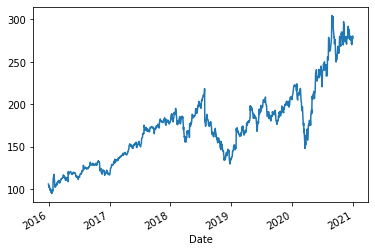

In [3]:
data['High'].plot()

In [4]:
ts_decompose_add = seasonal_decompose(x=data['High'], 
                                          model='additive', 
                                          freq=36) 
# the frequency of fluctuation is more than one year thus cyclic component
estimated_trend_add = ts_decompose_add.trend
estimated_seasonal_add = ts_decompose_add.seasonal
estimated_residual_add = ts_decompose_add.resid

NameError: name 'seasonal_decompose' is not defined

In [5]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(data['High'], label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend_add, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal_add, label='Cyclic')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual_add, label='Residuals')
axes[3].legend(loc='upper left');

NameError: name 'plt' is not defined